In [1]:
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization

/home/devansh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
img = load_img('./input/train/train/Forward/screen_640x480_2018-01-15_12-18-58.png')  
x = img_to_array(img)  
print('image shape: ', x.shape)

image shape:  (480, 640, 3)


Step Forward after recognizing viwe


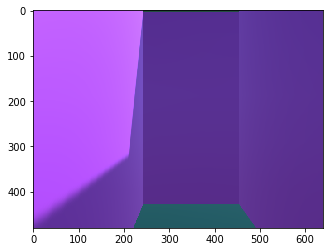

In [4]:
print('Step Forward after recognizing viwe')
plt.imshow(img)
plt.show()

Turn Left after recognizing viwe


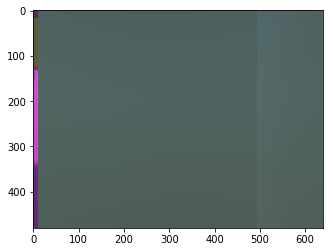

In [5]:
img = load_img('./input/train/train/Left/screen_640x480_2018-01-15_12-18-50.png')  
x = img_to_array(img) 
print('Turn Left after recognizing viwe')
plt.imshow(img)
plt.show()

In [6]:
img = load_img('./input/train/train/Right/screen_640x480_2018-01-15_14-27-30.png')  
x = img_to_array(img)  # this is a Numpy array with shape (3, 480, 640)


Turn Right after recognizing viwe


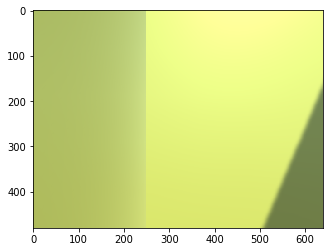

In [7]:
print('Turn Right after recognizing viwe')
plt.imshow(img)
plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(24, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 32)        128       
__________

In [10]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2)


test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
batch_size = 64

In [12]:

train_generator = train_datagen.flow_from_directory(
        './input/train/train',  
        target_size=(150, 150),  
        batch_size=batch_size)  

validation_generator = test_datagen.flow_from_directory(
        './input/test/test',
        target_size=(150, 150),
        batch_size=batch_size)

Found 1370 images belonging to 3 classes.
Found 340 images belonging to 3 classes.


In [13]:
def plot_res():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [15]:
import scipy.ndimage

history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

Epoch 1/5
31/31 [==============================] - 304s 10s/step - loss: 1.1402 - acc: 0.4829 - val_loss: 0.6944 - val_acc: 0.8029
Epoch 2/5
31/31 [==============================] - 311s 10s/step - loss: 0.7872 - acc: 0.7302 - val_loss: 0.6274 - val_acc: 0.8088
Epoch 3/5
31/31 [==============================] - 354s 11s/step - loss: 0.6886 - acc: 0.7720 - val_loss: 0.6654 - val_acc: 0.8088
Epoch 4/5
31/31 [==============================] - 324s 10s/step - loss: 0.6344 - acc: 0.8051 - val_loss: 0.6259 - val_acc: 0.8088
Epoch 5/5
31/31 [==============================] - 351s 11s/step - loss: 0.6428 - acc: 0.7854 - val_loss: 0.6287 - val_acc: 0.8088


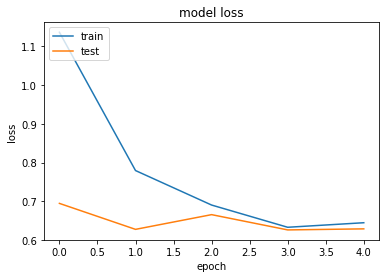

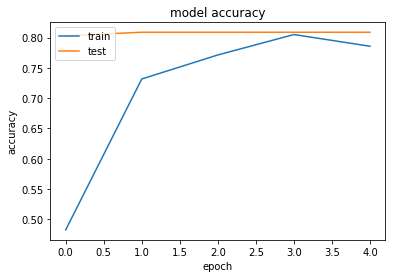

In [22]:
plot_res()

In [17]:
import scipy
import numpy as np

In [18]:
def get_reshape(x=img):
    img_resize = scipy.misc.imresize(x,(150,150,3))
    img_reshape = np.empty((1,150,150,3), dtype='float')
    img_reshape[0,:,:,:] = img_resize
    return(img_reshape)

In [19]:
def get_prediction(img_reshaped):
    pred = history.model.predict_classes(img_reshaped)[0]
    
    
    for action, val in train_generator.class_indices.items():   
        if val == pred:
            pred = action
    return(pred)

The label of image is marked as Forward


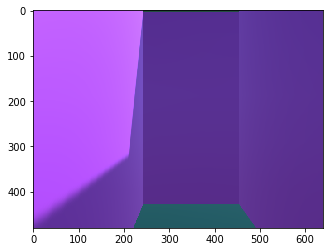

/home/devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


The predicted action to take is :  Forward
-------------------------------------------


In [20]:
img = load_img('./input/train/train/Forward/screen_640x480_2018-01-15_12-18-58.png')
x = img_to_array(img) 

print('The label of image is marked as Forward')
plt.imshow(img)
plt.show()

img_reshaped = get_reshape(x)
pred = get_prediction(img_reshaped)
print('The predicted action to take is : ', pred)
print('-------------------------------------------')

The label of image is marked as Left


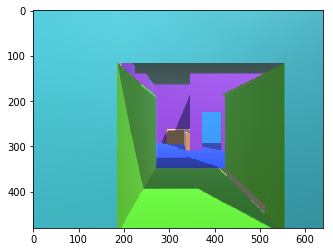

Prediction :  Forward


/home/devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [21]:
img = load_img('./input/test/test/Left/screen_640x480_2018-01-15_10-17-47.png')
x = img_to_array(img)  

print('The label of image is marked as Left')
plt.imshow(img)
plt.show()

img_reshaped = get_reshape(x)
pred = get_prediction(img_reshaped)
print('Prediction : ', pred)

The label of image is marked as Left


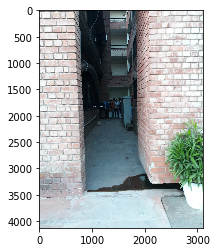

/home/devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


Prediction :  Forward


In [26]:
img = load_img('./midDoor.png')
x = img_to_array(img)  

print('The label of image is marked as Left')
plt.imshow(img)
plt.show()

img_reshaped = get_reshape(x)
pred = get_prediction(img_reshaped)
print('Prediction : ', pred)